In [3]:
from evasion import *
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import random

Network "instructions example" with 6 sensors in 8x8 room (period 40)


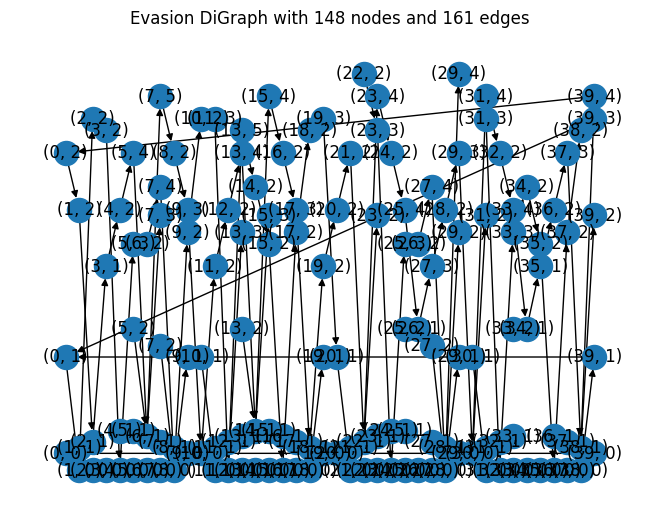

found 288 paths


In [4]:
network = NETWORKS[0]
print(network)
paths = network.evasion_paths(compute_homology=False)
print(f"found {len(paths)} paths")

In [5]:
# evasion_path = paths[0]
evasion_path = random.choice(paths)
# evasion_path = next(iter(p for p in paths if any(any(pos.y >= 5 for pos in area) for area in p)))

In [6]:
plt.rcParams["animation.html"] = "jshtml"
############
plt.rcParams['figure.dpi'] = 200
INTERP_FRAMES = 2
############
plt.ioff()
fig, ax = plt.subplots()

cmap = cm.get_cmap('viridis')
anchor = lambda pos: (pos.x - 1, pos.y - 1)

ax.set_xlim(0, network.room_width)
ax.set_ylim(0, network.room_height)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.invert_yaxis()

# Add a grid
ax.grid(True, which='major', color='black', linewidth=0.5)

# Set the major ticks at the edges of the squares and the minor ticks at the center of the squares
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

# Hide the major tick labels and use the minor tick labels instead
ax.tick_params(which='major', length=0, labelsize=0)
ax.tick_params(which='minor', length=0, labelsize=10)

# Set the labels of the minor ticks to be the integer values
ax.xaxis.set_minor_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}'))
ax.yaxis.set_minor_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}'))


frames_per_step = 1 + INTERP_FRAMES


def init():
    global squares, prev_points, frame_positions
    network.reset()

    step_positions = [[] for _ in range(len(network.sensors))]
    for _ in range(network.period):
        for i, sensor in enumerate(network.sensors):
            step_positions[i].append(sensor.curr_pos)
            sensor.move()
    
    # interpolate frames between steps
    frame_positions = [[] for _ in range(len(network.sensors))]
    for s in range(len(network.sensors)):
        for t in range(network.period):
            at_t = step_positions[s][t]
            at_t1 = step_positions[s][(t + 1) % network.period]
            for i in range(frames_per_step):
                frame_positions[s].append(
                    Position(
                        at_t.x + (at_t1.x - at_t.x) * i / frames_per_step,
                        at_t.y + (at_t1.y - at_t.y) * i / frames_per_step
                    )
                )

    squares = [
        plt.Rectangle((0, 0), 2, 2, color=cmap(i / len(network.sensors)))
        for i, sensor in enumerate(network.sensors)
    ]

    # Add the squares to the axes
    for square in squares:
        ax.add_patch(square)

    prev_points = []
    pass

def clear_points():
    for p in prev_points:
        p.remove()

    prev_points.clear()

# Animation update function
def update(frame_num):
    global squares, prev_points, frame_positions

    for i, square in enumerate(squares):
        square.set_xy(anchor(frame_positions[i][frame_num]))
        
    t = frame_num // frames_per_step

    if frame_num % frames_per_step == 0:
        # started a new unit time interval
        print(t, end=" ")
        clear_points() # remove points from previous time interval

        # OPT: keep points from previous time interval instead of computing intersection
        positions_after = evasion_path[t]
        positions_before = evasion_path[t - 1]

        for pos in (set(positions_after) & set(positions_before)):
            prev_points.extend(ax.plot(pos.x + 0.5, pos.y + 0.5, marker="s", color='green', markersize=15))
        # TODO: marker size relative to cell size

    elif frame_num % frames_per_step == 1:
        # entered a unit time interval
        clear_points() 
        positions_at = evasion_path[t]
        for pos in positions_at:
            prev_points.extend(ax.plot(pos.x + 0.5, pos.y + 0.5, 's', color='green'))


matplotlib.animation.FuncAnimation(fig, update, init_func=init, frames=network.period * frames_per_step)

C:\Users\andre\AppData\Local\Temp\ipykernel_13756\4096707225.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 